# Data Analysis of Olympic Games (1896-2022)

The Olympic Games are one of the most prestigious sporting events in the world. They have been held every four years since 1896, with the exception of World War I and World War II. The Games have seen some of the greatest athletes in history compete in a wide variety of sports.

The goal of this project is to research the history of the Olympic Games and find interesting statistics. The project aims to answer questions such as: 

- Which years,cities and countries the Olympics were held in ?

- Which country has won the most medals? 

- How has the participation of women in the Olympic Games changed over time?

- Do host countries generally win more medals in the Olympics?

- How has the number of sports in the Olympics changed over time?

- Which sport has the highest number of medals awarded? 


and more

The GitHub repo for the project is available at https://github.com/gururaser/data-analysis-of-olympic-games.

## Main Imports

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Which years,cities and countries the Olympics were held in ?
The Olympic Games have been held in various cities throughout different years. Let's explore which cities and years have hosted this prestigious event.

In [235]:
places = pd.read_csv('olympic_historical_dataset/Olympics_Games.csv')

In [236]:
places

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,13 July,NaN,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,6 July,27 July,5 May – 27 July,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59,2018 Winter Olympics,60,/editions/60,2018,PyeongChang,/images/flags/KOR.png,KOR,9 February,25 February,8 – 25 February,NaN
60,2022 Winter Olympics,62,/editions/62,2022,Beijing,/images/flags/CHN.png,CHN,4 February,20 February,2 – 20 February,NaN
61,2026 Winter Olympics,72,/editions/72,2026,Milano-Cortina d'Ampezzo,/images/flags/ITA.png,ITA,6 February,22 February,4 – 22 February,NaN
62,1956 Equestrian,48,/editions/48,1956,Stockholm,/images/flags/SWE.png,SWE,10 June,17 June,11 – 17 June,NaN


In [237]:
places["isHeld"].unique()

array([nan, 'Not held due to war'], dtype=object)

Unfortunately, the following Olympic games could not be held due to the first and second world wars.

In [238]:
not_held_due_war = places.query('isHeld == "Not held due to war"')[['edition','city','country_noc','isHeld']]
not_held_due_war

,edition,city,country_noc,isHeld
5,1916 Summer Olympics,Berlin,GER,Not held due to war
11,1940 Summer Olympics,Helsinki,FIN,Not held due to war
12,1944 Summer Olympics,London,GBR,Not held due to war
39,1940 Winter Olympics,Garmisch-Partenkirchen,GER,Not held due to war
40,1944 Winter Olympics,Cortina d'Ampezzo,ITA,Not held due to war


In [239]:
places = places[places["isHeld"] != 'Not held due to war']

In [240]:
places['edition'].unique()

array(['1896 Summer Olympics', '1900 Summer Olympics',
       '1904 Summer Olympics', '1908 Summer Olympics',
       '1912 Summer Olympics', '1920 Summer Olympics',
       '1924 Summer Olympics', '1928 Summer Olympics',
       '1932 Summer Olympics', '1936 Summer Olympics',
       '1948 Summer Olympics', '1952 Summer Olympics',
       '1956 Summer Olympics', '1960 Summer Olympics',
       '1964 Summer Olympics', '1968 Summer Olympics',
       '1972 Summer Olympics', '1976 Summer Olympics',
       '1980 Summer Olympics', '1984 Summer Olympics',
       '1988 Summer Olympics', '1992 Summer Olympics',
       '1996 Summer Olympics', '2000 Summer Olympics',
       '2004 Summer Olympics', '2008 Summer Olympics',
       '2012 Summer Olympics', '2016 Summer Olympics',
       '2020 Summer Olympics', '2024 Summer Olympics',
       '2028 Summer Olympics', '2032 Summer Olympics',
       '1924 Winter Olympics', '1928 Winter Olympics',
       '1932 Winter Olympics', '1936 Winter Olympics',
       '19

### What to do with "2024 Summer Olympics", "2026 Winter Olympics", "2028 Summer Olympics","2032 Summer Olympics","1956 Equestrian" and "1906 Intercalated"?

In [241]:
display(
    places.query("edition == '2024 Summer Olympics'"),
    places.query("edition == '2026 Winter Olympics'"),
    places.query("edition == '2028 Summer Olympics'"),
    places.query("edition == '2032 Winter Olympics'"),
    places.query("edition == '1956 Equestrian'"),
    places.query("edition == '1906 Intercalated'"))

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
32,2024 Summer Olympics,63,/editions/63,2024,Paris,/images/flags/FRA.png,FRA,NaN,NaN,—,NaN


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
61,2026 Winter Olympics,72,/editions/72,2026,Milano-Cortina d'Ampezzo,/images/flags/ITA.png,ITA,6 February,22 February,4 – 22 February,NaN


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
33,2028 Summer Olympics,64,/editions/64,2028,Los Angeles,/images/flags/USA.png,USA,NaN,NaN,—,NaN


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
62,1956 Equestrian,48,/editions/48,1956,Stockholm,/images/flags/SWE.png,SWE,10 June,17 June,11 – 17 June,NaN


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
63,1906 Intercalated,4,/editions/4,1906,Athina,/images/flags/GRE.png,GRE,22 April,2 May,22 April – 2 May,NaN


- I will drop "2024 Summer Olympics", "2026 Winter Olympics", "2028 Summer Olympics" and "2032 Summer Olympics" from our dataset because: The scope of the research is between 1896 and 2022.

- I will drop "1906 Intercalated" from our dataset because: The 1906 Intercalated Games was an international multi-sport event that was celebrated in Athens, Greece. They were at the time considered to be Olympic Games and were referred to as the “Second International Olympic Games in Athens” by the International Olympic Committee. However, today, the IOC and a few sports historians do not consider the 1906 Intercalated Olympics to be official Olympic Games

- As for the 1956 Equestrian Olympics, it was not a separate event but rather part of the Melbourne Olympics. The IOC awarded the Games of the XVIth Olympiad to Melbourne in Victoria, Australia but learned that Australian quarantine laws required a six-month quarantine period for horses entering the country. As a result, the equestrian events were held in Stockholm, Sweden. That's why I won't drop it.


In [242]:
places

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,13 July,NaN,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,6 July,27 July,5 May – 27 July,NaN
6,1920 Summer Olympics,7,/editions/7,1920,Antwerpen,/images/flags/BEL.png,BEL,14 August,30 August,23 April – 12 September,NaN
7,1924 Summer Olympics,8,/editions/8,1924,Paris,/images/flags/FRA.png,FRA,5 July,27 July,4 May – 27 July,NaN
8,1928 Summer Olympics,9,/editions/9,1928,Amsterdam,/images/flags/NED.png,NED,28 July,12 August,17 May – 12 August,NaN
9,1932 Summer Olympics,10,/editions/10,1932,Los Angeles,/images/flags/USA.png,USA,30 July,14 August,30 July – 14 August,NaN
10,1936 Summer Olympics,11,/editions/11,1936,Berlin,/images/flags/GER.png,GER,1 August,16 August,1 – 16 August,NaN


In [243]:
places = places.drop(index = [32,33,34,61,63]).reset_index(drop = True)
places

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,13 July,NaN,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,6 July,27 July,5 May – 27 July,NaN
5,1920 Summer Olympics,7,/editions/7,1920,Antwerpen,/images/flags/BEL.png,BEL,14 August,30 August,23 April – 12 September,NaN
6,1924 Summer Olympics,8,/editions/8,1924,Paris,/images/flags/FRA.png,FRA,5 July,27 July,4 May – 27 July,NaN
7,1928 Summer Olympics,9,/editions/9,1928,Amsterdam,/images/flags/NED.png,NED,28 July,12 August,17 May – 12 August,NaN
8,1932 Summer Olympics,10,/editions/10,1932,Los Angeles,/images/flags/USA.png,USA,30 July,14 August,30 July – 14 August,NaN
9,1936 Summer Olympics,11,/editions/11,1936,Berlin,/images/flags/GER.png,GER,1 August,16 August,1 – 16 August,NaN


### Adding new "country" column for mapping

In [244]:
country_codes = pd.DataFrame({
    'Code': ['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'GER', 'BEL', 'NED', 'FIN', 'AUS', 'ITA', 'JPN', 'MEX', 'FRG', 'CAN', 'URS', 'KOR', 'ESP', 'CHN', 'BRA', 'SUI', 'NOR', 'AUT', 'YUG', 'RUS'],
    'Country': ['Greece', 'France', 'United States', 'United Kingdom', 'Sweden', 'Germany', 'Belgium', 'Netherlands', 'Finland', 'Australia', 'Italy', 'Japan', 'Mexico', 'Federal Republic of Germany', 'Canada', 'Soviet Union', 'South Korea', 'Spain', 'China', 'Brazil', 'Switzerland', 'Norway', 'Austria', 'Yugoslavia', 'Russia']
})

places['homeowner_country'] = places['country_noc'].map(country_codes.set_index('Code')['Country'])

### Discarding some unnecessary columns

In [245]:
places_w_nec_cols = places[['edition','year','city','country_noc','competition_date','homeowner_country']]

In [246]:
places_w_nec_cols[places_w_nec_cols["homeowner_country"] == "Germany"]

,edition,year,city,country_noc,competition_date,homeowner_country
9,1936 Summer Olympics,1936,Berlin,GER,1 – 16 August,Germany
32,1936 Winter Olympics,1936,Garmisch-Partenkirchen,GER,6 – 16 February,Germany


In [247]:
places_w_nec_cols['country_noc'].unique()

array(['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'BEL', 'NED', 'GER', 'FIN',
       'AUS', 'ITA', 'JPN', 'MEX', 'FRG', 'CAN', 'URS', 'KOR', 'ESP',
       'CHN', 'BRA', 'SUI', 'NOR', 'AUT', 'YUG', 'RUS'], dtype=object)

In [248]:
places_w_nec_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edition            54 non-null     object
 1   year               54 non-null     int64 
 2   city               54 non-null     object
 3   country_noc        54 non-null     object
 4   competition_date   54 non-null     object
 5   homeowner_country  54 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.7+ KB


In [249]:
places_w_nec_cols

,edition,year,city,country_noc,competition_date,homeowner_country
0,1896 Summer Olympics,1896,Athina,GRE,6 – 13 April,Greece
1,1900 Summer Olympics,1900,Paris,FRA,14 May – 28 October,France
2,1904 Summer Olympics,1904,St. Louis,USA,1 July – 26 November,United States
3,1908 Summer Olympics,1908,London,GBR,27 April – 31 October,United Kingdom
4,1912 Summer Olympics,1912,Stockholm,SWE,5 May – 27 July,Sweden
5,1920 Summer Olympics,1920,Antwerpen,BEL,23 April – 12 September,Belgium
6,1924 Summer Olympics,1924,Paris,FRA,4 May – 27 July,France
7,1928 Summer Olympics,1928,Amsterdam,NED,17 May – 12 August,Netherlands
8,1932 Summer Olympics,1932,Los Angeles,USA,30 July – 14 August,United States
9,1936 Summer Olympics,1936,Berlin,GER,1 – 16 August,Germany


In [250]:
host_counts = places_w_nec_cols['homeowner_country'].value_counts()
host_counts

United States                  8
France                         5
Japan                          4
United Kingdom                 3
Canada                         3
Italy                          3
Greece                         2
Australia                      2
Switzerland                    2
Norway                         2
China                          2
Germany                        2
Austria                        2
Sweden                         2
South Korea                    2
Yugoslavia                     1
Brazil                         1
Mexico                         1
Spain                          1
Soviet Union                   1
Federal Republic of Germany    1
Finland                        1
Netherlands                    1
Belgium                        1
Russia                         1
Name: homeowner_country, dtype: int64

In [251]:
top_countries = host_counts.index[:2]
#palette = ['red' if country in top_countries else 'grey' for country in host_counts.index]

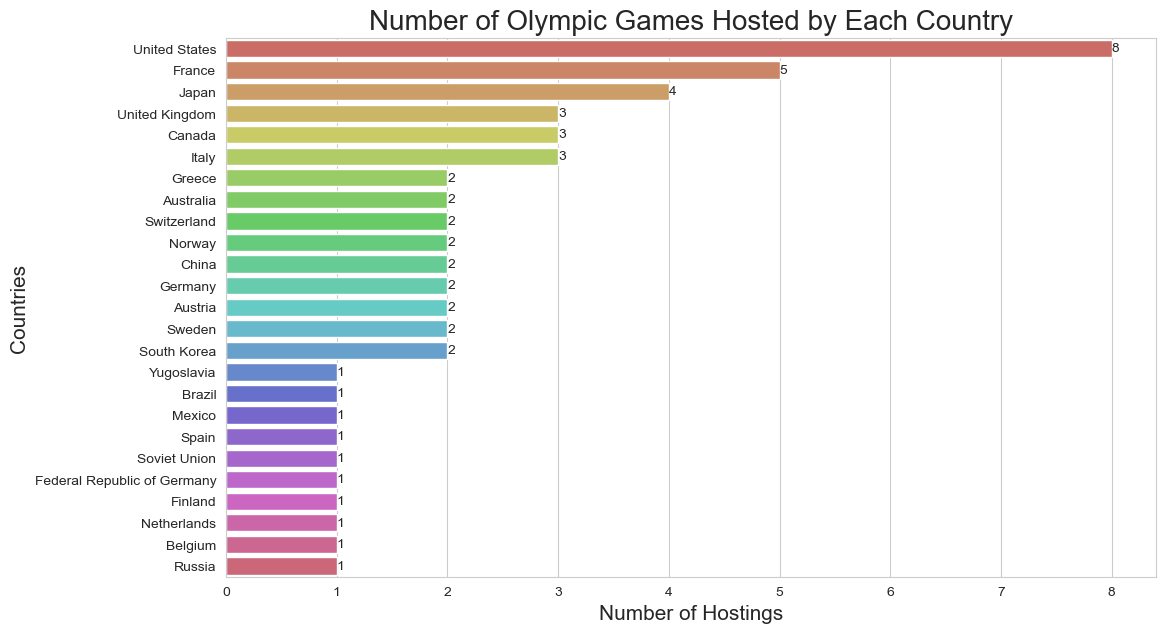

In [252]:
plt.figure(figsize = (12,7))
sns.set_style('whitegrid')
ax = sns.countplot(
    y = 'homeowner_country', 
    data = places_w_nec_cols, 
    order = host_counts.index, 
    palette = "hls")
ax.bar_label(ax.containers[0])
# Set the title and axis labels
plt.title("Number of Olympic Games Hosted by Each Country",fontsize = 20)
plt.ylabel("Countries",fontsize = 15)
plt.xlabel("Number of Hostings",fontsize = 15)
plt.savefig('number_of_olympic_games_by_each_country.png',dpi = 300, bbox_inches = 'tight')
plt.show()

In [253]:
places_w_nec_cols['city'].value_counts()

London                    3
Athina                    2
Tokyo                     2
Innsbruck                 2
Lake Placid               2
Sankt Moritz              2
Paris                     2
Beijing                   2
Stockholm                 2
Los Angeles               2
Calgary                   1
Cortina d'Ampezzo         1
Squaw Valley              1
St. Louis                 1
Grenoble                  1
Sapporo                   1
Sarajevo                  1
Albertville               1
Garmisch-Partenkirchen    1
Lillehammer               1
Nagano                    1
Salt Lake City            1
Torino                    1
Vancouver                 1
Sochi                     1
Oslo                      1
Berlin                    1
Helsinki                  1
Antwerpen                 1
Chamonix                  1
Rio de Janeiro            1
Amsterdam                 1
Sydney                    1
Atlanta                   1
Barcelona                 1
Seoul               

## Which country has won the most medals?
The Olympic Games, a pinnacle of global sports, have showcased incredible performances by athletes from countries worldwide. One question that arises is: which country has won the most medals in these prestigious games? By exploring the Olympic Games' history, we can uncover the nation that has consistently excelled, earning numerous medals over the years. This achievement not only reflects a country's sporting prowess but also highlights its commitment to nurturing talented athletes and promoting a culture of athletic excellence. Join us as we journey through Olympic history to discover the country that leads in Olympic medal achievements, leaving an indelible mark on the world of sports.

In [254]:
medals = pd.read_csv('olympic_historical_dataset/Olympic_Games_Medal_Tally.csv')

In [255]:
medals.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [256]:
medals.tail()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
1802,1906 Intercalated,4,1906,Canada,CAN,1,1,0,2
1803,1906 Intercalated,4,1906,Norway,NOR,1,1,0,2
1804,1906 Intercalated,4,1906,Netherlands,NED,0,1,2,3
1805,1906 Intercalated,4,1906,Australia,AUS,0,0,3,3
1806,1906 Intercalated,4,1906,Bohemia,BOH,0,0,2,2


### Let's drop "1906 Intercalated"
I will drop "1906 Intercalated" from our dataset because: The 1906 Intercalated Games was an international multi-sport event that was celebrated in Athens, Greece. They were at the time considered to be Olympic Games and were referred to as the “Second International Olympic Games in Athens” by the International Olympic Committee. However, today, the IOC and a few sports historians do not consider the 1906 Intercalated Olympics to be official Olympic Games

In [257]:
# Creating new dataframe without "1906 Intercalated"
medals = medals[medals["edition"] != "1906 Intercalated"]

In [258]:
medals.tail()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
1784,1956 Equestrian,48,1956,Great Britain,GBR,1,0,2,3
1785,1956 Equestrian,48,1956,Italy,ITA,0,2,1,3
1786,1956 Equestrian,48,1956,Denmark,DEN,0,1,0,1
1787,1956 Equestrian,48,1956,Canada,CAN,0,0,1,1
1788,1956 Equestrian,48,1956,Switzerland,SUI,0,0,1,1


In [259]:
medals_total = medals.groupby("country").agg({"total" : "sum"}).sort_values(by = "total", ascending = False).reset_index()
# Alternative code medals.groupby("country")[["total"]].sum().sort_values(by = "total",ascending=False)
medals_total

,country,total
0,United States,2985
1,Soviet Union,1204
2,Germany,1083
3,Great Britain,965
4,France,910
...,...,...
149,Sudan,1
150,Djibouti,1
151,Tonga,1
152,Togo,1


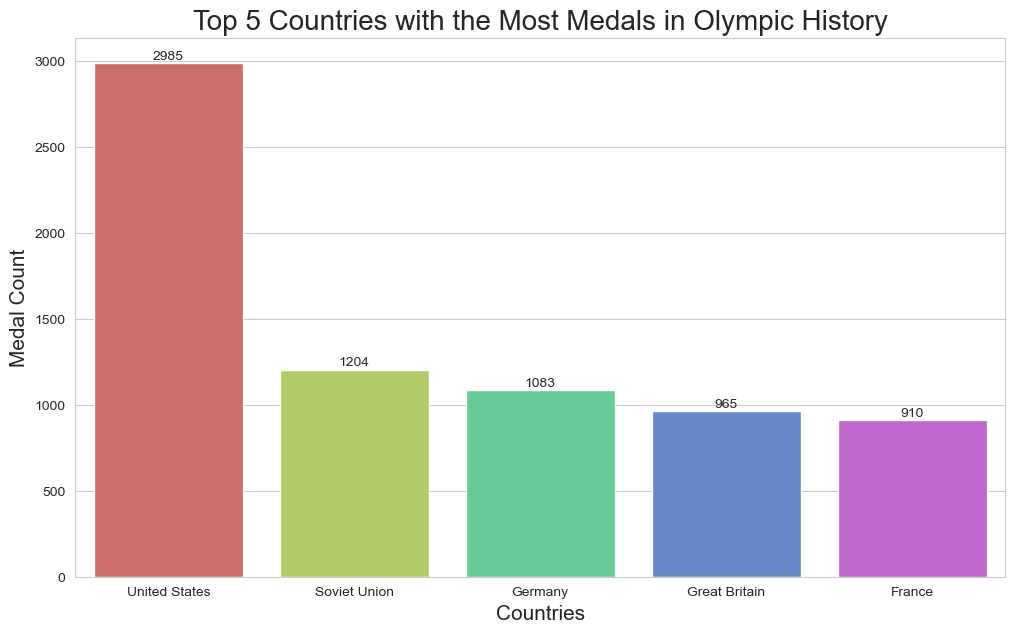

In [260]:
plt.figure(figsize = (12,7))
ax = sns.barplot(data = medals_total.head(5), x = "country", y = "total", palette="hls")

# Add the number of medals on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.xlabel("Countries",fontsize = 15)
plt.ylabel("Medal Count", fontsize = 15)
plt.title("Top 5 Countries with the Most Medals in Olympic History", fontsize = 20)
plt.savefig("top5_medal_countries.png", dpi=300,bbox_inches = 'tight')
plt.show()

['United States', 'Soviet Union', 'Germany', 'Great Britain', 'France']

,year,country,edition_id,gold,silver,bronze,total
0,1896,France,1,5,4,2,11
1,1896,Germany,1,6,5,2,13
2,1896,Great Britain,1,2,3,2,7
3,1896,United States,1,11,7,2,20
4,1900,France,2,31,40,40,111
...,...,...,...,...,...,...,...
143,2020,United States,61,39,41,33,113
144,2022,France,62,5,7,2,14
145,2022,Germany,62,12,10,5,27
146,2022,Great Britain,62,1,1,0,2


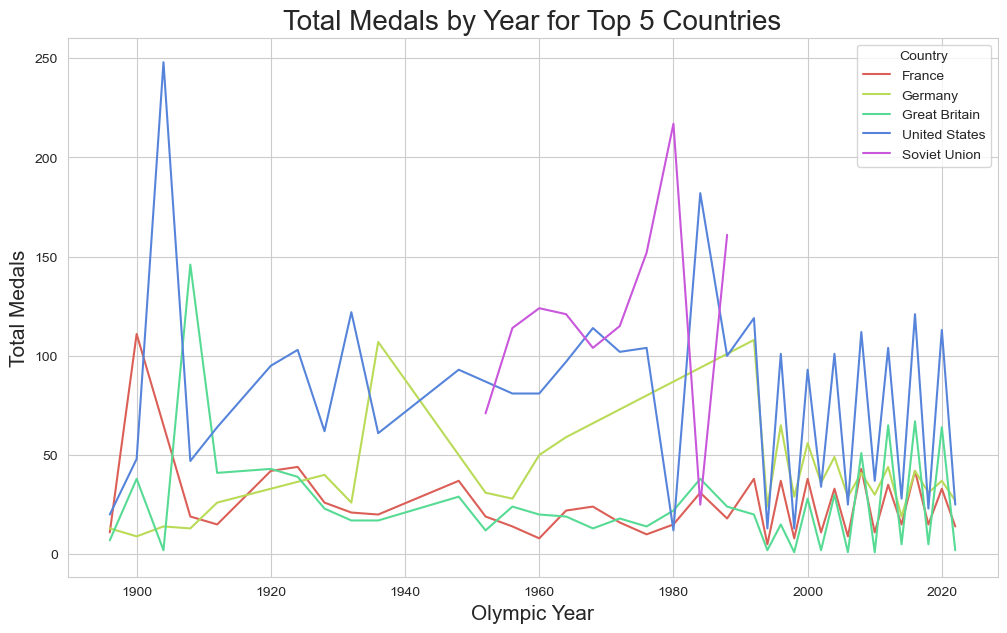

In [379]:
top5_countries = medals_total.head(5)['country'].tolist()
display(top5_countries)

top5_medals_by_year = medals[medals['country'].isin(top5_countries)].groupby(['year', 'country']).sum().reset_index()
display(top5_medals_by_year)

plt.figure(figsize=(12, 7))
sns.lineplot(data=top5_medals_by_year, x='year', y='total', hue='country',palette="hls")
plt.xlabel('Olympic Year',fontsize = 15)
plt.ylabel('Total Medals',fontsize = 15)
plt.title('Total Medals by Year for Top 5 Countries',fontsize = 20)
plt.legend(title='Country', loc='upper right')
plt.savefig("top5_medals_by_20_years_lineplot.png" ,dpi = 300, bbox_inches = 'tight')
plt.show()


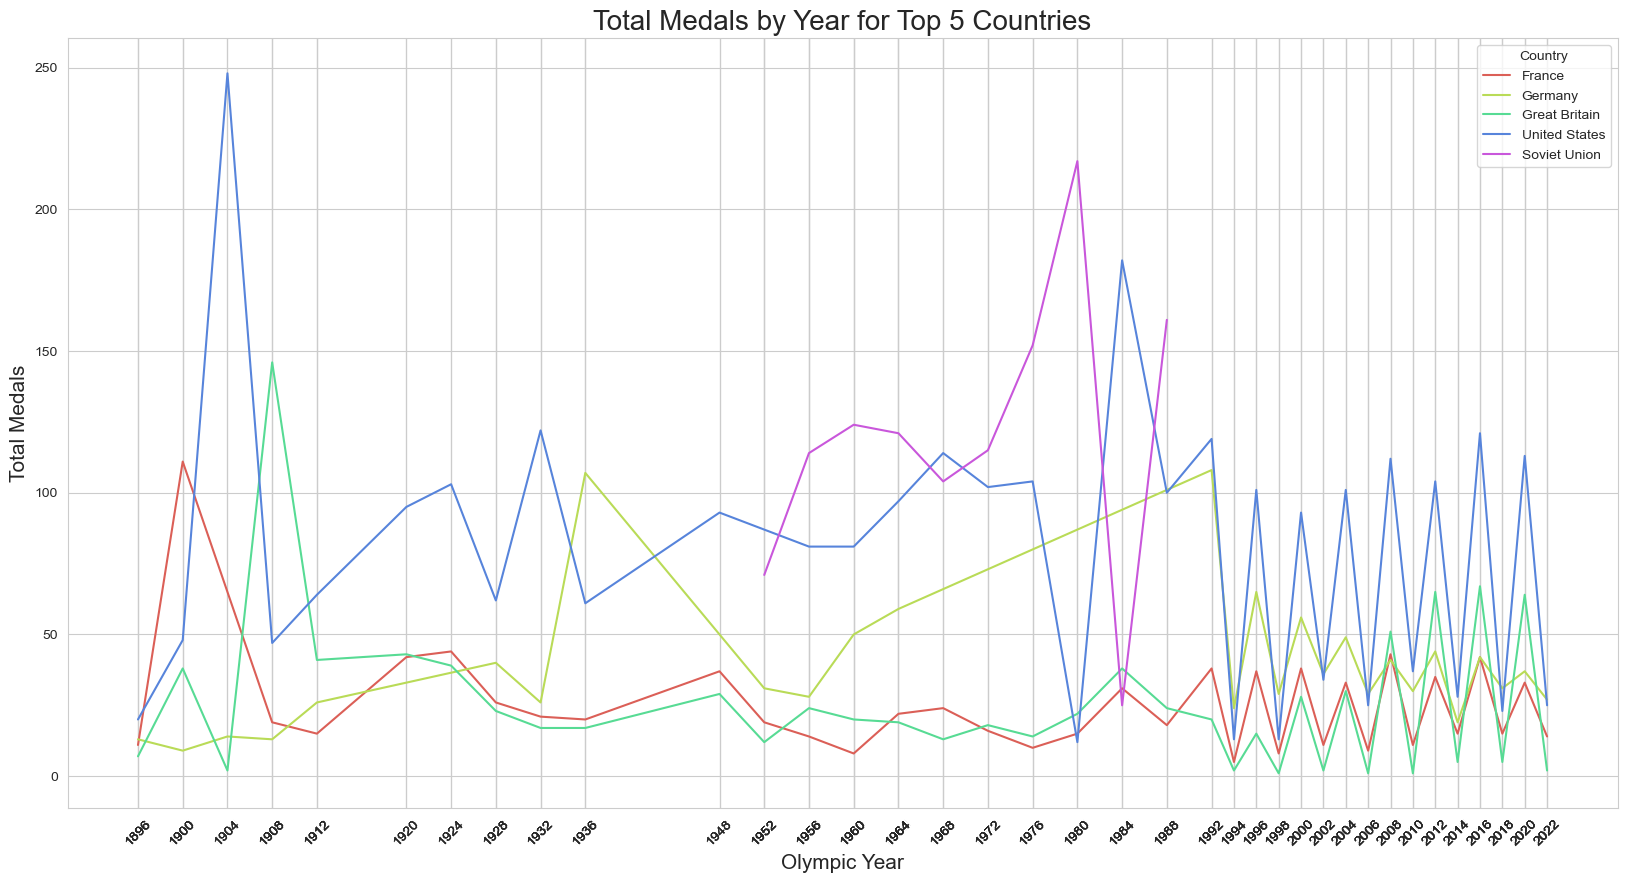

In [378]:
top5_medals_by_year = top5_medals_by_year.sort_values('year')
plt.figure(figsize=(20, 10))
sns.lineplot(data=top5_medals_by_year, x='year', y='total', hue='country',palette="hls")
plt.xlabel('Olympic Year',fontsize = 15)
plt.ylabel('Total Medals',fontsize = 15)
plt.title('Total Medals by Year for Top 5 Countries',fontsize = 20)
plt.legend(title='Country', loc='upper right')
plt.xticks(top5_medals_by_year['year'], rotation=45)
plt.savefig("top5_medals_by_year_lineplot.png" ,dpi = 300, bbox_inches = 'tight')
plt.show()


### Cumulative Graphs for Top 5 Countries

,year,country,edition_id,gold,silver,bronze,total,cumulative_total
0,1896,France,1,5,4,2,11,11
1,1896,Germany,1,6,5,2,13,13
2,1896,Great Britain,1,2,3,2,7,7
3,1896,United States,1,11,7,2,20,20
4,1900,France,2,31,40,40,111,122
...,...,...,...,...,...,...,...,...
143,2020,United States,61,39,41,33,113,2960
146,2022,Great Britain,62,1,1,0,2,965
144,2022,France,62,5,7,2,14,910
145,2022,Germany,62,12,10,5,27,1083


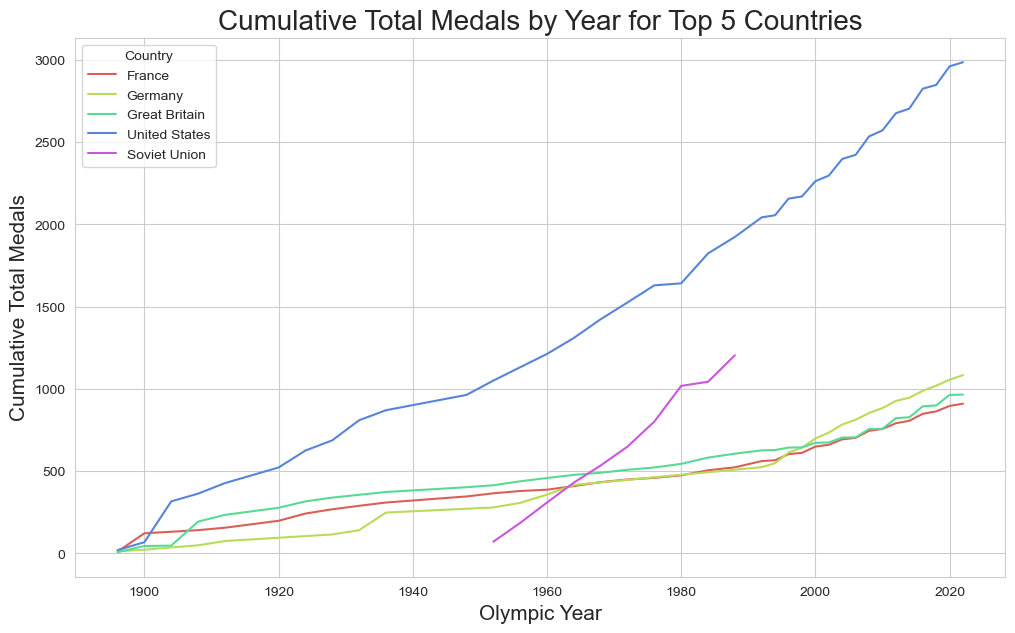

In [376]:
top5_medals_cumulative = top5_medals_by_year.groupby('country')['total'].cumsum()
top5_medals_by_year['cumulative_total'] = top5_medals_cumulative
display(top5_medals_by_year)

plt.figure(figsize=(12, 7))
sns.lineplot(data=top5_medals_by_year, x='year', y='cumulative_total', hue='country',palette="hls")
plt.xlabel('Olympic Year',fontsize = 15)
plt.ylabel('Cumulative Total Medals',fontsize = 15)
plt.title('Cumulative Total Medals by Year for Top 5 Countries',fontsize = 20)
plt.legend(title='Country', loc='upper left')
plt.savefig("top5_cumulative_medals_by_20_years_lineplot.png" ,dpi = 300, bbox_inches = 'tight')
plt.show()


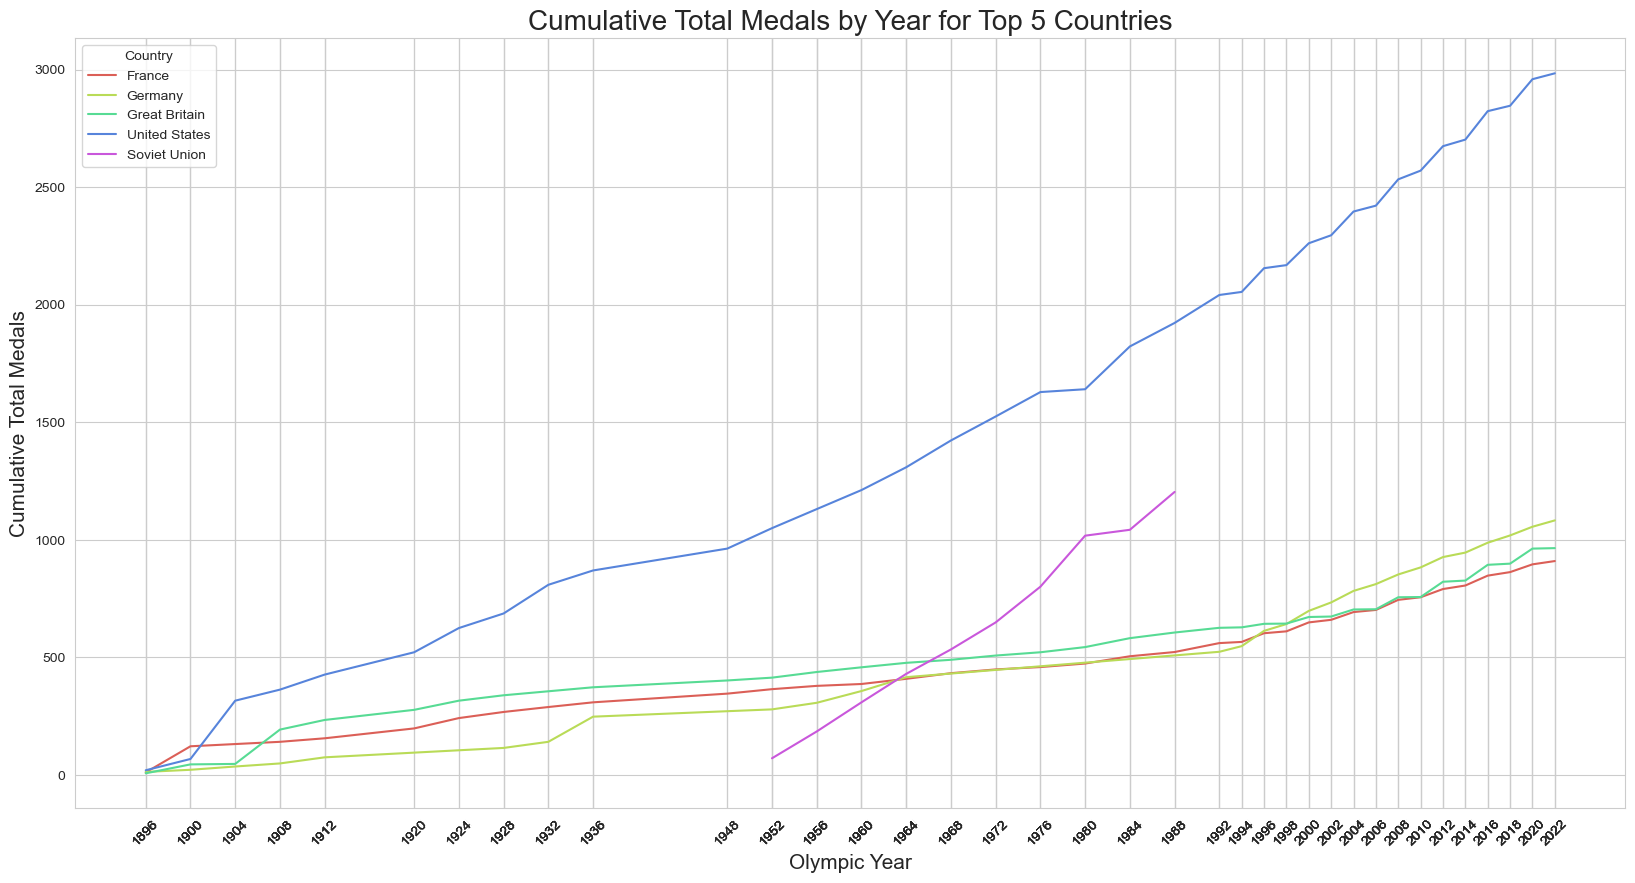

In [377]:
top5_medals_by_year = top5_medals_by_year.sort_values('year')
plt.figure(figsize=(20, 10))
sns.lineplot(data=top5_medals_by_year, x='year', y='cumulative_total', hue='country',palette="hls")
plt.xlabel('Olympic Year',fontsize = 15)
plt.ylabel('Cumulative Total Medals',fontsize = 15)
plt.title('Cumulative Total Medals by Year for Top 5 Countries',fontsize = 20)
plt.legend(title='Country', loc='upper left',)
plt.xticks(top5_medals_by_year['year'], rotation=45)
plt.show()


### Russian Empire, Russian Federation and ROC ?


Looking at the top 5 countries with the most medals, we see that all except the Soviet Union have participated continuously from 1896 to 2022. However, the Soviet Union only participated in the Olympic Games from 1952 to 1988. Russians did not only participate in the Olympics under the Soviet Union, here are other names representing the Russian people:

- The Russian Empire participated in 3 Olympics, namely the 1900 Summer Olympics, 1908 Summer Olympics, and 1912 Summer Olympics, and won a total of 8 medals.

- The Russian Federation participated in 12 Olympic games from 1994 to 2016 and won a total of 543 medals.

- In 2016, Russian athletes were allowed to participate in the Summer Olympics in Rio de Janeiro under the name "Russian Federation". However, in 2017, the International Olympic Committee (IOC) suspended Russia for the state-sponsored doping scandal. As a result, Russian athletes were not allowed to participate in the 2018 Winter Olympics in Pyeongchang, South Korea, under the Russian flag. Instead, they were allowed to participate under the Olympic Athletes from Russia (OAR) delegation. At the 2020 Summer Olympics in Tokyo and the 2022 Winter Olympics in Beijing, Russian athletes were allowed to participate under the banner of the Russian Olympic Committee (ROC) . The IOC rules state that all public displays of the organization's participant name should use the acronym "ROC," not the full name "Russian Olympic Committee" If an ROC athlete wins a medal, a Tchaikovsky song piece is played instead of the Russian national anthem, and the ROC flag, which features the Olympic rings and red, blue, and white stripes, is flown. ROC won a total of 120 medals.


In [265]:
medals_rf = medals[medals["country"] == "Russian Federation"].groupby(['year', 'country']).sum().reset_index()
medals_rf['cumulative_total'] = medals_rf.groupby('country')['total'].cumsum()
medals_rf

,year,country,edition_id,gold,silver,bronze,total,cumulative_total
0,1908,Russian Federation,5,1,2,0,3,3
1,1912,Russian Federation,6,0,2,3,5,8
2,1994,Russian Federation,45,11,8,4,23,31
3,1996,Russian Federation,24,26,21,16,63,94
4,1998,Russian Federation,46,9,6,3,18,112
5,2000,Russian Federation,25,32,28,29,89,201
6,2002,Russian Federation,47,5,4,4,13,214
7,2004,Russian Federation,26,28,26,36,90,304
8,2006,Russian Federation,49,8,6,8,22,326
9,2008,Russian Federation,53,24,13,23,60,386


In [266]:
medals_roc = medals[medals["country"] == "ROC"].groupby(['year', 'country']).sum().reset_index()
medals_roc['cumulative_total'] = medals_roc.groupby("country")['total'].cumsum()
medals_roc

,year,country,edition_id,gold,silver,bronze,total,cumulative_total
0,2018,ROC,60,2,6,9,17,17
1,2020,ROC,61,20,28,23,71,88
2,2022,ROC,62,6,12,14,32,120


## How has the participation of women in the Olympic Games changed over time?

In [267]:
athlete_df = pd.read_csv('olympic_historical_dataset/Olympic_Athlete_Bio.csv')
event_result_df = pd.read_csv('olympic_historical_dataset/Olympic_Athlete_Event_Results.csv')

In [268]:
athlete_df.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,16809,Károly Teppert,Male,1891-07-20,na,na,Hungary,HUN,Károly Teppert started competing in cycling in...,na
1,43737,Andrzej Socharski,Male,1947-08-31,173.0,72,Poland,POL,na,Listed in Olympians Who Won a Medal at the Wor...
2,50147,Nathalie Wunderlich,Female,1971-06-03,170.0,50,Switzerland,SUI,na,na
3,5085,Miha Lokar,Male,1935-09-10,182.0,76,Yugoslavia,YUG,na,Listed in Olympians Who Won a Medal at the Eur...
4,136329,Austin Hack,Male,1992-05-17,203.0,100,United States,USA,na,na


In [269]:
event_result_df.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False


In [270]:
merged_df = pd.merge(event_result_df[['athlete_id','edition']],athlete_df[['athlete_id','name','sex','country','country_noc']],on = "athlete_id")

In [271]:
merged_df.head()

,athlete_id,edition,name,sex,country,country_noc
0,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ
1,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ
2,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ
3,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ
4,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ


In [272]:
# Let's add "year" and "season" column to our dataframe
# 1956 Equestrian Olympics was also part of Summer Olympics
merged_df['year'] = merged_df['edition'].str.split(' ').str[0]
merged_df['season'] = merged_df['edition'].str.contains('Winter')
merged_df['season'] = merged_df['season'].map({True: 'Winter', False: 'Summer'})


In [273]:
merged_df.head()

,athlete_id,edition,name,sex,country,country_noc,year,season
0,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ,1908,Summer
1,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ,1908,Summer
2,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ,1908,Summer
3,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ,1908,Summer
4,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ,1908,Summer


In [274]:
merged_df[merged_df["edition"] == "1906  Intercalated Games"]

,athlete_id,edition,name,sex,country,country_noc,year,season
3975,79698,1906 Intercalated Games,Evangelos Volanakis,Male,Crete,CRT,1906,Summer
3976,79698,1906 Intercalated Games,Evangelos Volanakis,Male,Crete,CRT,1906,Summer
3977,79698,1906 Intercalated Games,Evangelos Volanakis,Male,Crete,CRT,1906,Summer
3978,79698,1906 Intercalated Games,Evangelos Volanakis,Male,Crete,CRT,1906,Summer
3979,79698,1906 Intercalated Games,Evangelos Volanakis,Male,Crete,CRT,1906,Summer
3980,79699,1906 Intercalated Games,Mikhail Giannarakis,Male,Crete,CRT,1906,Summer
3981,79699,1906 Intercalated Games,Mikhail Giannarakis,Male,Crete,CRT,1906,Summer
3982,79699,1906 Intercalated Games,Mikhail Giannarakis,Male,Crete,CRT,1906,Summer
3983,79699,1906 Intercalated Games,Mikhail Giannarakis,Male,Crete,CRT,1906,Summer
3984,79699,1906 Intercalated Games,Mikhail Giannarakis,Male,Crete,CRT,1906,Summer


In [275]:
# We won't include "1906 Intercalated Games" to our analysis
merged_df = merged_df[merged_df["edition"] != "1906  Intercalated Games"]

In [276]:
# let's drop duplicates
merged_df = merged_df.drop_duplicates()

In [277]:
merged_df.head()

,athlete_id,edition,name,sex,country,country_noc,year,season
0,64710,1908 Summer Olympics,Ernest Hutcheon,Male,Australasia,ANZ,1908,Summer
5,64756,1908 Summer Olympics,Henry Murray,Male,Australasia,ANZ,1908,Summer
9,64808,1908 Summer Olympics,Harvey Sutton,Male,Australasia,ANZ,1908,Summer
10,922519,1908 Summer Olympics,Guy Haskins,Male,Australasia,ANZ,1908,Summer
14,64735,1908 Summer Olympics,Joseph Lynch,Male,Australasia,ANZ,1908,Summer


In [278]:
merged_df[merged_df["season"] == "Winter"]

,athlete_id,edition,name,sex,country,country_noc,year,season
597,95621,1994 Winter Olympics,Faauuga Muagututia,Male,American Samoa,ASA,1994,Winter
598,87937,1994 Winter Olympics,Brad Kiltz,Male,American Samoa,ASA,1994,Winter
625,140556,2022 Winter Olympics,Nathan Crumpton,Male,American Samoa,ASA,2022,Winter
1470,110734,2006 Winter Olympics,Erjon Tola,Male,Albania,ALB,2006,Winter
1473,110734,2010 Winter Olympics,Erjon Tola,Male,Albania,ALB,2010,Winter
...,...,...,...,...,...,...,...,...
314902,149161,2022 Winter Olympics,Giorgia Birkeland,Female,United States,USA,2022,Winter
314903,148470,2022 Winter Olympics,Giada Andreutti,Female,Italy,ITA,2022,Winter
314904,148662,2022 Winter Olympics,Karlien Sleper,Female,Netherlands,NED,2022,Winter
314905,138683,2022 Winter Olympics,Viktória Čerňanská,Female,Slovakia,SVK,2022,Winter


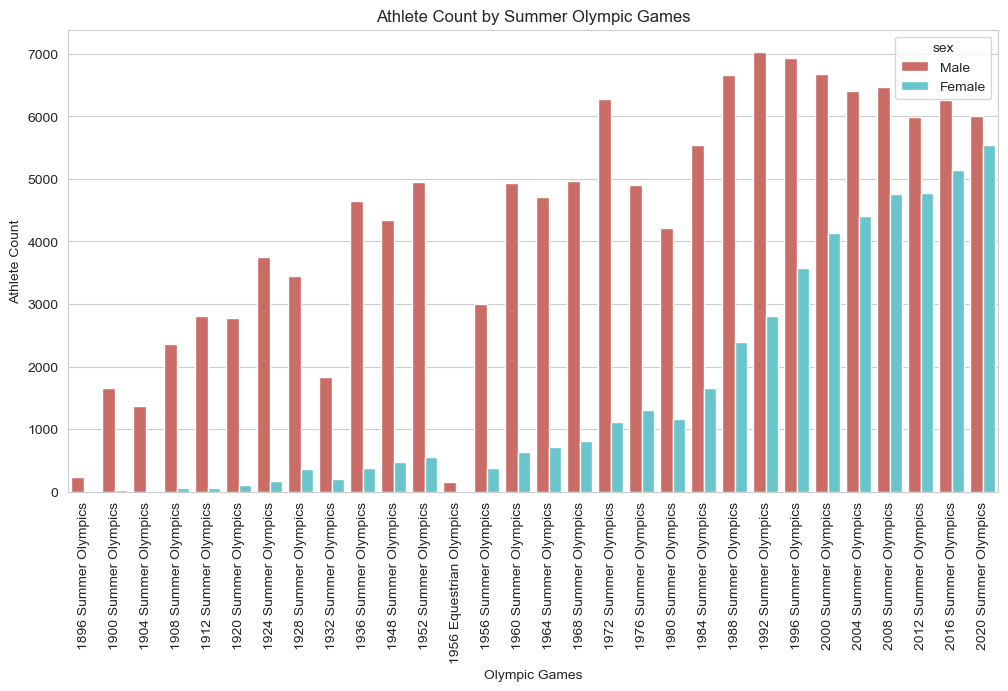

In [279]:
summer_games = merged_df[merged_df["season"] == "Summer"]
order = summer_games['edition'].sort_values().unique()

plt.figure(figsize=(12, 6))
sns.countplot(x="edition",hue = "sex", order = order, data= summer_games,palette = "hls")
plt.xticks(rotation=90)
plt.xlabel("Olympic Games")
plt.ylabel("Athlete Count")
plt.title("Athlete Count by Summer Olympic Games")
plt.savefig("athlete_count_by_summer_games.png",dpi = 300, bbox_inches = 'tight')  
plt.show()


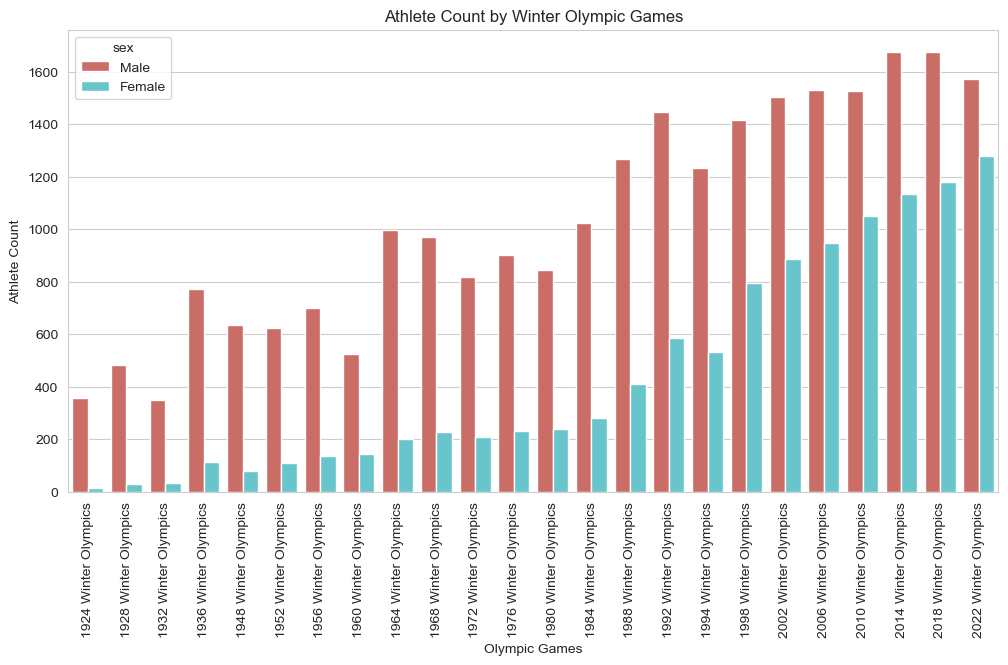

In [280]:
winter_games = merged_df[merged_df["season"] == "Winter"]
order = winter_games['edition'].sort_values().unique()

plt.figure(figsize=(12, 6))
sns.countplot(x="edition", hue="sex", order=order, data=winter_games, palette="hls")
plt.xticks(rotation=90)
plt.xlabel("Olympic Games")
plt.ylabel("Athlete Count")
plt.title("Athlete Count by Winter Olympic Games")

plt.savefig("athlete_count_by_winter_games.png",dpi = 300, bbox_inches = 'tight')
plt.show()


In [281]:
def calculate_athlete_pct(sex, olympic_name):
    """
    Calculate the percentage of athletes of a given sex in a given Olympic Game.

    Args:
        sex (str): The sex of the athletes. Can be 'Male' for male or 'Female' for female.
        olympic_name (str): The name of the Olympic edition. For example, '1980 Summer Olympics'.

    Returns:
        float: The percentage of athletes of the given sex in the given Olympic edition.
    """
    total_athlete = len(merged_df[(merged_df['edition'] == olympic_name)])
    target_athlete = len(merged_df[(merged_df['edition'] == olympic_name) & (merged_df['sex'] == sex)])
    target_pct = (target_athlete / total_athlete) * 100
    return target_pct


women_pct_1980_summer = calculate_athlete_pct("Female","1980 Summer Olympics") # 21.623629946126695
women_pct_2020_summer = calculate_athlete_pct("Female","2020 Summer Olympics") # 47.96086241233007

women_pct_1994_winter = calculate_athlete_pct("Female","1994 Winter Olympics") # 30.198300283286116
women_pct_2022_winter = calculate_athlete_pct("Female","2022 Winter Olympics") # 44.83848314606742


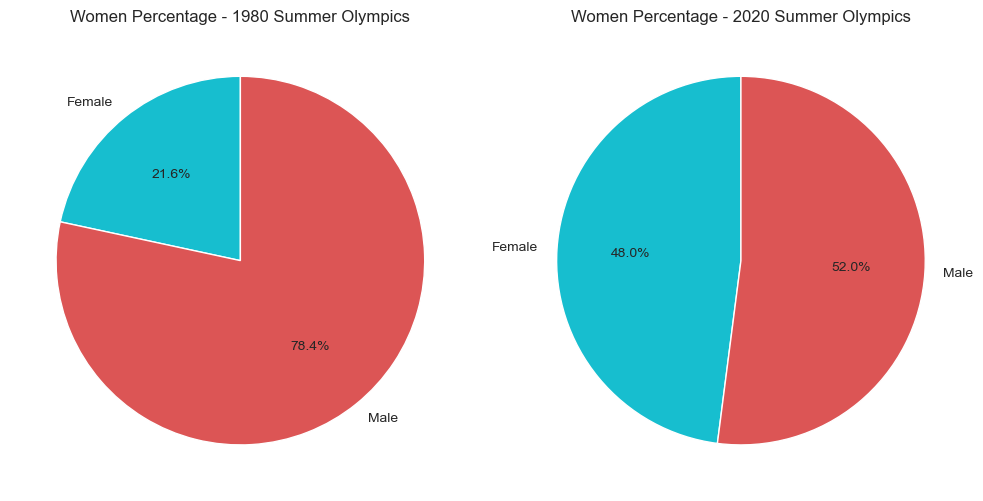

In [282]:
chosen_colors = ["#17becf","#dc5555"]
sns.set_palette(chosen_colors)

# Define the data
labels = ['Female', 'Male']
sizes_1980 = [women_pct_1980_summer, 100 - women_pct_1980_summer]
sizes_2020 = [women_pct_2020_summer, 100 - women_pct_2020_summer]

# Create subplots for the two pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a pie chart for the left side
axes[0].pie(sizes_1980, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Women Percentage - 1980 Summer Olympics')

# Create a pie chart for the right side
axes[1].pie(sizes_2020, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Women Percentage - 2020 Summer Olympics')

# Display the two pie charts side by side
plt.tight_layout()
plt.savefig('women_pct_summer_pie_charts.png',dpi = 300, bbox_inches = 'tight')
plt.show()


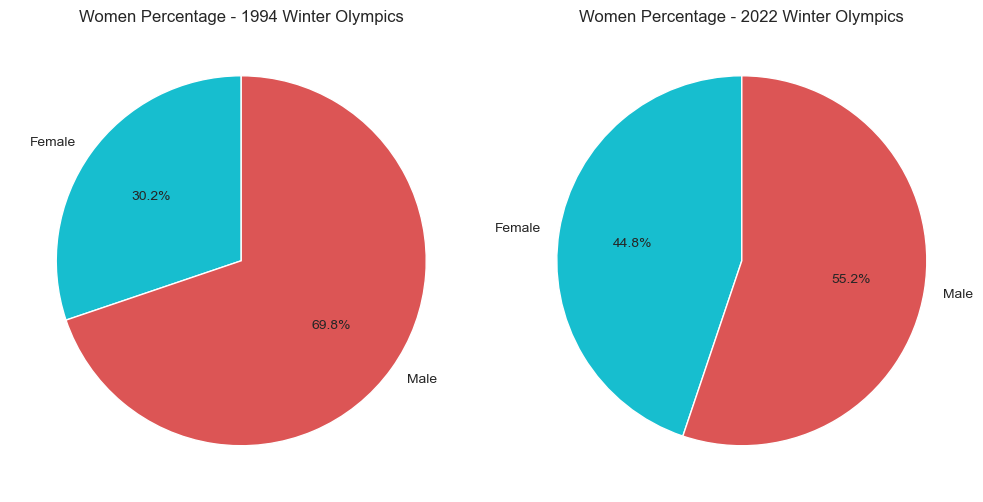

In [283]:
chosen_colors = ["#17becf","#dc5555"]
sns.set_palette(chosen_colors)

# Define the data
labels = ['Female', 'Male']
sizes_1994 = [women_pct_1994_winter, 100 - women_pct_1994_winter]
sizes_2022 = [women_pct_2022_winter, 100 - women_pct_2022_winter]

# Create subplots for the two pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a pie chart for the left side
axes[0].pie(sizes_1994, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Women Percentage - 1994 Winter Olympics')

# Create a pie chart for the right side
axes[1].pie(sizes_2022, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Women Percentage - 2022 Winter Olympics')

# Display the two pie charts side by side
plt.tight_layout()
plt.savefig('women_pct_winter_pie_charts.png',dpi = 300, bbox_inches = 'tight')
plt.show()


### Group by Olympic Games

In [284]:
merged_df.groupby(["edition","sex"]).agg({"athlete_id" : "count"}).reset_index().rename(columns={"athlete_id": "athlete_count"})


,edition,sex,athlete_count
0,1896 Summer Olympics,Female,2
1,1896 Summer Olympics,Male,241
2,1900 Summer Olympics,Female,30
3,1900 Summer Olympics,Male,1652
4,1904 Summer Olympics,Female,6
...,...,...,...
103,2018 Winter Olympics,Male,1675
104,2020 Summer Olympics,Female,5539
105,2020 Summer Olympics,Male,6010
106,2022 Winter Olympics,Female,1277


In [285]:
# only female athletes by olympic games
female_counts_by_games = merged_df[merged_df["sex"] == "Female"].groupby("edition").agg({"athlete_id" : "count"}).reset_index().rename(columns={"athlete_id": "female_athlete_count"})
female_counts_by_games.head(10)

,edition,female_athlete_count
0,1896 Summer Olympics,2
1,1900 Summer Olympics,30
2,1904 Summer Olympics,6
3,1908 Summer Olympics,54
4,1912 Summer Olympics,62
5,1920 Summer Olympics,106
6,1924 Summer Olympics,170
7,1924 Winter Olympics,16
8,1928 Summer Olympics,357
9,1928 Winter Olympics,28


In [286]:
#plt.figure(figsize=(12, 6))
#sns.barplot(x="edition", y="female_athlete_count", data=female_counts_by_games, palette = "hls")
#plt.xticks(rotation=90)
#plt.xlabel("Edition")
#plt.ylabel("Female Athlete Count")
#plt.title("Female Athlete Count by Edition")
#plt.show()


### Group by Year

In [287]:
merged_df.groupby(["year","sex"]).agg({"athlete_id" : "count"}).rename(columns={"athlete_id": "athlete_count"})

athlete_count
year sex                  
1896 Female              2
     Male              241
1900 Female             30
     Male             1652
1904 Female              6
...                    ...
2018 Male             1675
2020 Female           5539
     Male             6010
2022 Female           1277
     Male             1571

[74 rows x 1 columns]

In [288]:
# only female athletes by year
merged_df[merged_df["sex"] == "Female"].groupby("year").agg({"athlete_id" : "count"}).reset_index().rename(columns={"athlete_id": "female_athlete_count"})

,year,female_athlete_count
0,1896,2
1,1900,30
2,1904,6
3,1908,54
4,1912,62
5,1920,106
6,1924,186
7,1928,385
8,1932,240
9,1936,499


### Group by Season

In [289]:
merged_df.groupby(["season","sex"]).agg({"athlete_id" : "count"}).rename(columns={"athlete_id": "athlete_count"})

athlete_count
season sex                  
Summer Female          47729
       Male           131362
Winter Female          10841
       Male            24843

In [290]:
# only female athletes by season
female_counts_by_season = merged_df[merged_df["sex"] == "Female"].groupby("season").agg({"athlete_id" : "count"}).reset_index().rename(columns={"athlete_id": "athlete_count"})
female_counts_by_season

,season,athlete_count
0,Summer,47729
1,Winter,10841


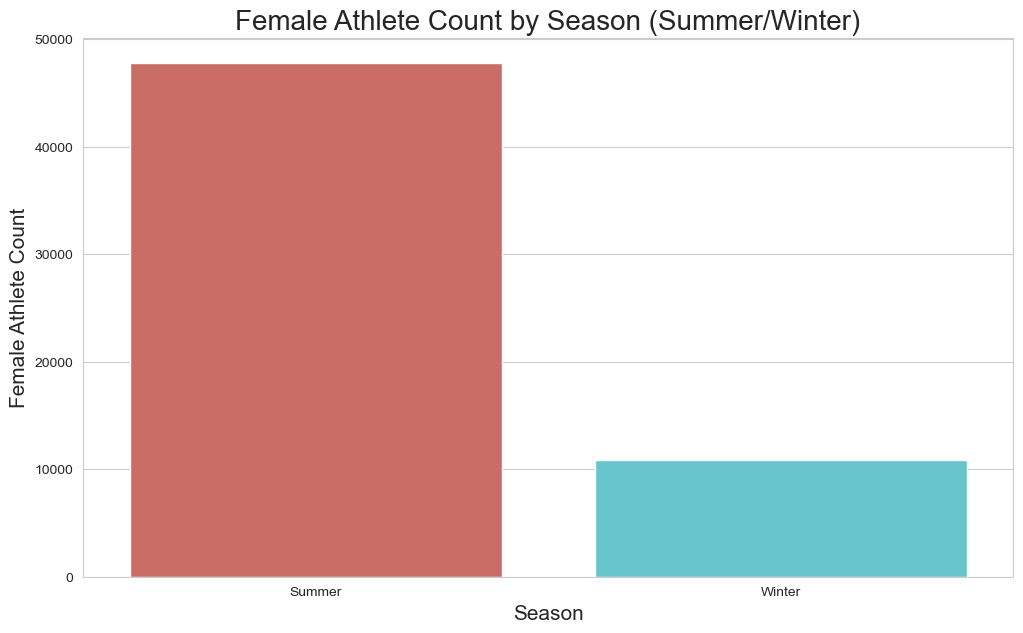

In [373]:
plt.figure(figsize=(12, 7))
sns.barplot(x="season", y="athlete_count", data=female_counts_by_season,palette="hls")
#plt.xticks(rotation=90)
plt.xlabel("Season",fontsize = 15)
plt.ylabel("Female Athlete Count",fontsize = 15)
plt.title("Female Athlete Count by Season (Summer/Winter)",fontsize = 20)
plt.show()

## Do host countries generally win more medals in the Olympics?

In [292]:
# We will use the dataframes we uploaded before
display(places.head(),medals.head())

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld,homeowner_country
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,14 May – 28 October,NaN,France
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,14 May,NaN,1 July – 26 November,NaN,United States
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,13 July,NaN,27 April – 31 October,NaN,United Kingdom
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,6 July,27 July,5 May – 27 July,NaN,Sweden


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [293]:
# Let's merge them
host_countries = pd.merge(places,medals, how = "left", on = "edition",suffixes = ('','_y'))
host_countries

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld,homeowner_country,edition_id_y,year_y,country,country_noc_y,gold,silver,bronze,total
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,6 April,15 April,6 – 13 April,NaN,Greece,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,1956 Equestrian,48,/editions/48,1956,Stockholm,/images/flags/SWE.png,SWE,10 June,17 June,11 – 17 June,NaN,Sweden,48,1956,Great Britain,GBR,1,0,2,3
1785,1956 Equestrian,48,/editions/48,1956,Stockholm,/images/flags/SWE.png,SWE,10 June,17 June,11 – 17 June,NaN,Sweden,48,1956,Italy,ITA,0,2,1,3
1786,1956 Equestrian,48,/editions/48,1956,Stockholm,/images/flags/SWE.png,SWE,10 June,17 June,11 – 17 June,NaN,Sweden,48,1956,Denmark,DEN,0,1,0,1
1787,1956 Equestrian,48,/editions/48,1956,Stockholm,/images/flags/SWE.png,SWE,10 June,17 June,11 – 17 June,NaN,Sweden,48,1956,Canada,CAN,0,0,1,1


In [294]:
host_countries_cols = host_countries[['edition', 'year', 'city', 'country_noc', 'homeowner_country', 'country', 'country_noc_y', 'gold', 'silver', 'bronze', 'total']]
host_countries_cols

,edition,year,city,country_noc,homeowner_country,country,country_noc_y,gold,silver,bronze,total
0,1896 Summer Olympics,1896,Athina,GRE,Greece,United States,USA,11,7,2,20
1,1896 Summer Olympics,1896,Athina,GRE,Greece,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1896,Athina,GRE,Greece,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1896,Athina,GRE,Greece,France,FRA,5,4,2,11
4,1896 Summer Olympics,1896,Athina,GRE,Greece,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...,...,...
1784,1956 Equestrian,1956,Stockholm,SWE,Sweden,Great Britain,GBR,1,0,2,3
1785,1956 Equestrian,1956,Stockholm,SWE,Sweden,Italy,ITA,0,2,1,3
1786,1956 Equestrian,1956,Stockholm,SWE,Sweden,Denmark,DEN,0,1,0,1
1787,1956 Equestrian,1956,Stockholm,SWE,Sweden,Canada,CAN,0,0,1,1


In [295]:
max_medal_teams = host_countries_cols.groupby("edition").apply(lambda x: x.loc[x.groupby('edition')['total'].idxmax()].nlargest(1, ['gold', 'silver', 'bronze'])).reset_index(drop=True)[['edition', 'country_noc', 'homeowner_country', 'country_noc_y', 'country', 'gold', 'silver', 'bronze', 'total']]
result_df = max_medal_teams.reset_index(drop=True)
result_df

,edition,country_noc,homeowner_country,country_noc_y,country,gold,silver,bronze,total
0,1896 Summer Olympics,GRE,Greece,GRE,Greece,10,18,19,47
1,1900 Summer Olympics,FRA,France,FRA,France,31,40,40,111
2,1904 Summer Olympics,USA,United States,USA,United States,80,85,83,248
3,1908 Summer Olympics,GBR,United Kingdom,GBR,Great Britain,56,51,39,146
4,1912 Summer Olympics,SWE,Sweden,SWE,Sweden,23,25,17,65
5,1920 Summer Olympics,BEL,Belgium,USA,United States,41,27,27,95
6,1924 Summer Olympics,FRA,France,USA,United States,45,27,27,99
7,1924 Winter Olympics,FRA,France,NOR,Norway,4,7,6,17
8,1928 Summer Olympics,NED,Netherlands,USA,United States,22,18,16,56
9,1928 Winter Olympics,SUI,Switzerland,NOR,Norway,6,4,5,15


In [296]:
result_df[result_df['homeowner_country'] == result_df['country']]

,edition,country_noc,homeowner_country,country_noc_y,country,gold,silver,bronze,total
0,1896 Summer Olympics,GRE,Greece,GRE,Greece,10,18,19,47
1,1900 Summer Olympics,FRA,France,FRA,France,31,40,40,111
2,1904 Summer Olympics,USA,United States,USA,United States,80,85,83,248
4,1912 Summer Olympics,SWE,Sweden,SWE,Sweden,23,25,17,65
10,1932 Summer Olympics,USA,United States,USA,United States,44,36,30,110
11,1932 Winter Olympics,USA,United States,USA,United States,6,4,2,12
12,1936 Summer Olympics,GER,Germany,GER,Germany,38,31,32,101
17,1952 Winter Olympics,NOR,Norway,NOR,Norway,7,3,6,16
31,1980 Summer Olympics,URS,Soviet Union,URS,Soviet Union,80,69,46,195
33,1984 Summer Olympics,USA,United States,USA,United States,83,61,30,174


In [297]:
# The index, not column one shows total medal ranking of homeowner country, in this example China became 11th in the olympic games hosted
d = host_countries_cols[host_countries_cols['edition'] == "2022 Winter Olympics"].sort_values(by = "total",ascending = False).reset_index()
d[d['country_noc_y'] == d['country_noc']]


,index,edition,year,city,country_noc,homeowner_country,country,country_noc_y,gold,silver,bronze,total
10,1755,2022 Winter Olympics,2022,Beijing,CHN,China,People's Republic of China,CHN,9,4,2,15


In [298]:
# In the below, we applied the example code in the above to all olympic games and we calculated average position in total medal rankings
editions = host_countries_cols['edition'].unique()
medal_ranking_count = 0
for edition in editions:
    df = host_countries_cols[host_countries_cols['edition'] == edition].sort_values(by='total', ascending=False).reset_index()
    result = df[df['country_noc_y'] == df['country_noc']]
    medal_ranking_count += (result.index[0]+1)
    #display(result)
# average position of host countries in the total medal rankings around 54 olympic games
medal_ranking_count / 54

5.2407407407407405

In [299]:
# If we look at mean column we can find average number of countries participating in an Olympic game
host_countries_cols.groupby("edition").count().describe()

,year,city,country_noc,homeowner_country,country,country_noc_y,gold,silver,bronze,total
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,33.129630,33.129630,33.129630,33.129630,33.129630,33.129630,33.129630,33.129630,33.129630,33.129630
std,23.386858,23.386858,23.386858,23.386858,23.386858,23.386858,23.386858,23.386858,23.386858,23.386858
min,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
25%,16.250000,16.250000,16.250000,16.250000,16.250000,16.250000,16.250000,16.250000,16.250000,16.250000
50%,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
75%,42.500000,42.500000,42.500000,42.500000,42.500000,42.500000,42.500000,42.500000,42.500000,42.500000
max,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000


According to the analysis, in 54 Olympic Games held between 1896 and 2022, the host country became the country with the most medals in 12 of them. On average, in every 5 Olympic games, the host country reached the position of the country with the most medals at the end of the games. The ranking of the host countries according to the total number of medals was an average of 5.24 out of an average of 33.13 medal winners per Olympic Games.

## How has the number of sports in the Olympics changed over time?

In [300]:
# Let's starting by discarding "1906  Intercalated Games"
event_result_df = event_result_df[event_result_df["edition"] != "1906  Intercalated Games"]
event_result_df

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False
...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False


In [306]:
# We only need these columns
sports_df = event_result_df[["edition","sport","isTeamSport"]]
sports_df

,edition,sport,isTeamSport
0,1908 Summer Olympics,Athletics,False
1,1908 Summer Olympics,Athletics,False
2,1908 Summer Olympics,Athletics,False
3,1908 Summer Olympics,Athletics,False
4,1908 Summer Olympics,Athletics,False
...,...,...,...
314902,2022 Winter Olympics,Bobsleigh,False
314903,2022 Winter Olympics,Bobsleigh,False
314904,2022 Winter Olympics,Bobsleigh,False
314905,2022 Winter Olympics,Bobsleigh,False


In [311]:
unique_sports_df = sports_df.drop_duplicates(subset=['edition', 'sport'])
unique_sports_df

,edition,sport,isTeamSport,year
0,1908 Summer Olympics,Athletics,False,1908
29,1908 Summer Olympics,Boxing,False,1908
31,1908 Summer Olympics,Diving,False,1908
32,1908 Summer Olympics,Rugby,True,1908
63,1908 Summer Olympics,Shooting,False,1908
...,...,...,...,...
293991,1904 Summer Olympics,Roque,False,1904
294384,1904 Summer Olympics,Water Polo,True,1904
294411,1904 Summer Olympics,Wrestling,False,1904
296874,1932 Summer Olympics,American Football,True,1932


In [319]:
# Let's add "year" and "season" column to our dataframe
# 1956 Equestrian Olympics was also part of Summer Olympics
unique_sports_df = unique_sports_df.copy()
unique_sports_df['year'] = unique_sports_df['edition'].str.split(' ').str[0]
unique_sports_df['season'] = unique_sports_df['edition'].str.contains('Winter')
unique_sports_df['season'] = unique_sports_df['season'].map({True: 'Winter', False: 'Summer'})

In [327]:
unique_sports_df.reset_index(drop=True, inplace=True)
unique_sports_df

,edition,sport,isTeamSport,year,season
0,1908 Summer Olympics,Athletics,False,1908,Summer
1,1908 Summer Olympics,Boxing,False,1908,Summer
2,1908 Summer Olympics,Diving,False,1908,Summer
3,1908 Summer Olympics,Rugby,True,1908,Summer
4,1908 Summer Olympics,Shooting,False,1908,Summer
...,...,...,...,...,...
1123,1904 Summer Olympics,Roque,False,1904,Summer
1124,1904 Summer Olympics,Water Polo,True,1904,Summer
1125,1904 Summer Olympics,Wrestling,False,1904,Summer
1126,1932 Summer Olympics,American Football,True,1932,Summer


In [352]:
# Number of sports in the olympic games
unique_sports_per_game = unique_sports_df.groupby("edition").agg({"sport":"count"}).reset_index()
unique_sports_per_game

,edition,sport
0,1896 Summer Olympics,10
1,1900 Summer Olympics,27
2,1904 Summer Olympics,20
3,1908 Summer Olympics,26
4,1912 Summer Olympics,21
5,1920 Summer Olympics,30
6,1924 Summer Olympics,27
7,1924 Winter Olympics,10
8,1928 Summer Olympics,23
9,1928 Winter Olympics,10


In [361]:
# Adding season column
unique_sports_per_game = unique_sports_per_game.merge(unique_sports_df[["edition", "season"]], on="edition")
unique_sports_per_game

,edition,sport,season
0,1896 Summer Olympics,10,Summer
1,1896 Summer Olympics,10,Summer
2,1896 Summer Olympics,10,Summer
3,1896 Summer Olympics,10,Summer
4,1896 Summer Olympics,10,Summer
...,...,...,...
1123,2022 Winter Olympics,15,Winter
1124,2022 Winter Olympics,15,Winter
1125,2022 Winter Olympics,15,Winter
1126,2022 Winter Olympics,15,Winter


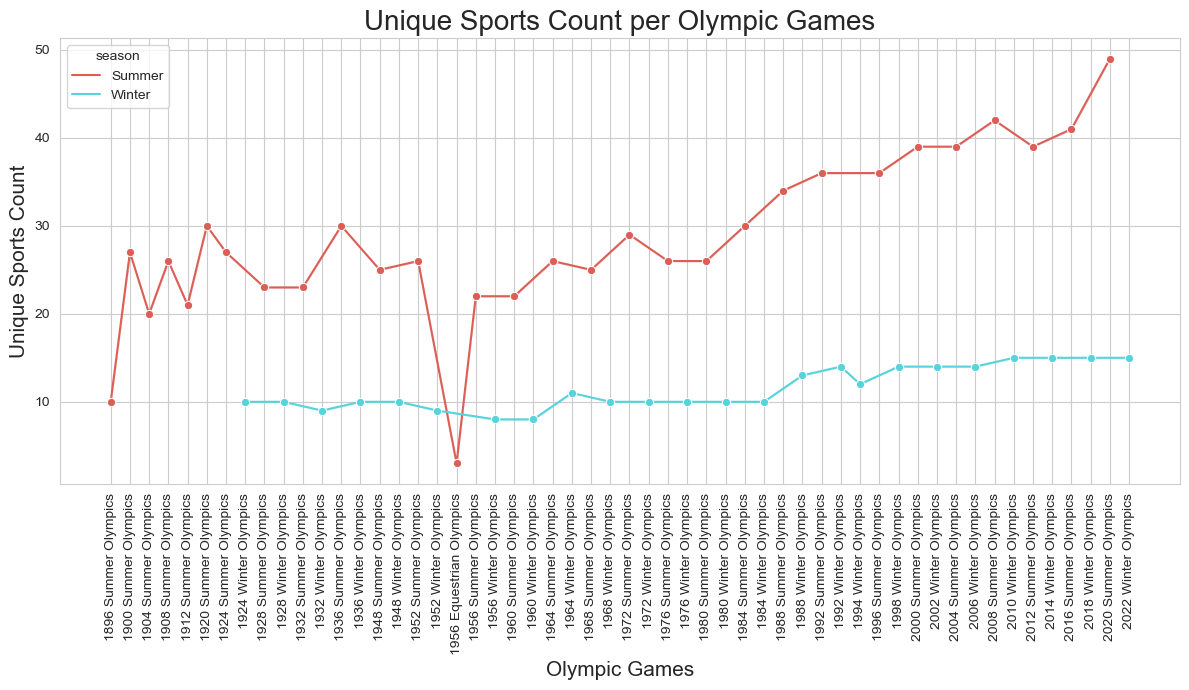

In [375]:
# Line plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=unique_sports_per_game, x='edition', y='sport', marker='o',palette = "hls",hue = "season")
plt.xlabel('Olympic Games',fontsize = 15)
plt.ylabel('Unique Sports Count',fontsize = 15)
plt.title('Unique Sports Count per Olympic Games',fontsize = 20)
plt.xticks(rotation=90)
plt.tight_layout()

# Savefig
plt.savefig('unique_sports_lineplot.png',dpi = 300, bbox_inches = 'tight')
plt.show()